<a href="https://colab.research.google.com/github/ahanam05/deep-learning/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST dataset digit classification
Following [this tutorial](https://medium.com/data-science/handwritten-digit-mnist-pytorch-977b5338e627)

In [23]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torch import nn, optim
from torchvision import datasets, transforms


# downloading the dataset and transforming images to tensors
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

training_set = datasets.MNIST(root = "./data", train = True, download = True, transform = transform)
validation_set = datasets.MNIST(root = "./data", train = False, download = True, transform = transform)

training_loader = torch.utils.data.DataLoader(training_set, batch_size = 64, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size = 64, shuffle = True)


torch.Size([64, 1, 28, 28])
torch.Size([64])


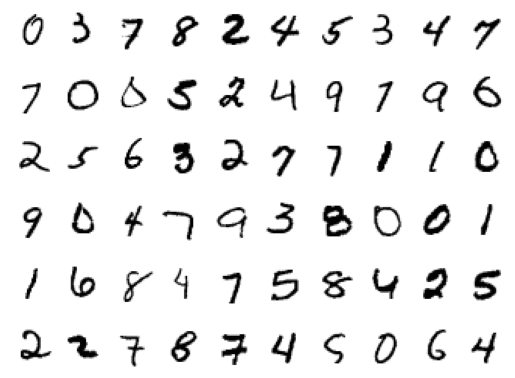

In [24]:
# EDA
dataiter = iter(training_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')


In [25]:
# building the neural network model
input_layer = 784
hidden_layers = [128, 64]
output_layer = 10

model = nn.Sequential(nn.Linear(input_layer, hidden_layers[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_layers[0], hidden_layers[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_layers[1], output_layer),
                      nn.LogSoftmax(dim = 1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [26]:
# defining loss and optimizer
loss_fn = nn.NLLLoss()
learning_rate = 0.003
momentum = 0.9
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = momentum)

In [27]:
# training loop
epochs = 15
start_time = time()

for epoch in range(epochs):
  running_loss = 0
  for images, labels in training_loader:
    images = images.view(images.shape[0], -1)
    output = model(images)
    loss = loss_fn(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"Epoch: {epoch}, training loss: {running_loss/len(training_loader)}")

print("Time taken (in mins): ", (time() - start_time)/60)

Epoch: 0, training loss: 0.6590214844769252
Epoch: 1, training loss: 0.28602142923914675
Epoch: 2, training loss: 0.22115098696146437
Epoch: 3, training loss: 0.17688016832939216
Epoch: 4, training loss: 0.1469957291531855
Epoch: 5, training loss: 0.12543992502594997
Epoch: 6, training loss: 0.11028439752749607
Epoch: 7, training loss: 0.09859318979906598
Epoch: 8, training loss: 0.08797747177332005
Epoch: 9, training loss: 0.08140264258487646
Epoch: 10, training loss: 0.07550094024772679
Epoch: 11, training loss: 0.0675661350771197
Epoch: 12, training loss: 0.06144976926379716
Epoch: 13, training loss: 0.05743963258993278
Epoch: 14, training loss: 0.052514284140746124
Time taken (in mins):  4.320049786567688


In [28]:
# function to view an image and its predicted classes
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


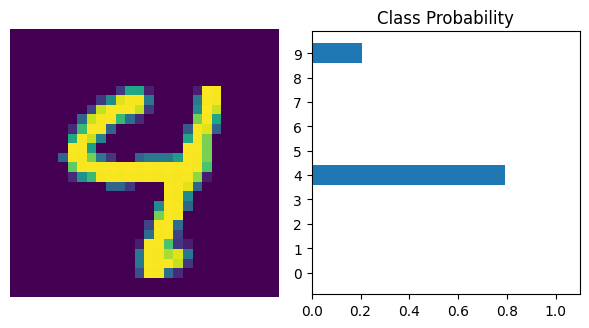

In [29]:
# using the validation set for testing

images, labels = next(iter(validation_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [30]:
# evaluating the model
correct_count, all_count = 0, 0
for images,labels in validation_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9723
